In [1]:
import pandas as pd

df_offerings = pd.read_csv(r"C:\Users\willf\OneDrive\Documents\NYDSA\Reviews Project\NYCDSA REVIEWS PROJECT\TAreviews\offerings.csv")
df_reviews = pd.read_csv(r"C:\Users\willf\OneDrive\Documents\NYDSA\Reviews Project\NYCDSA REVIEWS PROJECT\TAreviews\reviews.csv")

In [2]:
df_offerings.head()

,hotel_class,region_id,url,phone,details,address,type,id,name
0,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '147 West 4...",hotel,113317,Casablanca Hotel Times Square
1,5.0,32655,http://www.tripadvisor.com/Hotel_Review-g32655...,NaN,NaN,"{'region': 'CA', 'street-address': '300 S Dohe...",hotel,76049,Four Seasons Hotel Los Angeles at Beverly Hills
2,3.5,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '790 Eighth...",hotel,99352,Hilton Garden Inn Times Square
3,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '152 West 5...",hotel,93589,The Michelangelo Hotel
4,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '130 West 4...",hotel,217616,The Muse Hotel New York


In [3]:
import ast
def extract_id (author_str):
    dict_repr= ast.literal_eval(author_str)
    return dict_repr['id']

df_reviews['reviewer_id'] = df_reviews['author'].apply(extract_id)



In [4]:
df_reviews.head()

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,reviewer_id
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,2012-12-17,147643103,False,8C0B42FF3C0FA366A21CFD785302A032
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,2012-12-17,147639004,False,E3C85CA9DBBBC77E0DB534ABE93E4713
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great Stay”,This is a great property in Midtown. We two di...,"{'username': 'vuguru', 'num_cities': 12, 'num_...",December 2012,1762573,0,2012-12-18,147697954,False,FB1032DECE1162CB3556D05F278AAFFD
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,"{'username': 'Hotel-Designer', 'num_cities': 5...",August 2012,1762573,0,2012-12-17,147625723,False,EC3E275EE7590694889C8C7EE0D13961
4,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,"{'username': 'JamesE339', 'num_cities': 34, 'n...",December 2012,1762573,0,2012-12-17,147612823,False,BA524A238B1171206691A6CC3F28F266


In [5]:
df_ratings = df_reviews['ratings'].apply(lambda x: pd.Series(ast.literal_eval(x)))

df_reviews = pd.concat([df_reviews, df_ratings], axis=1)

df_reviews.drop('ratings', axis=1, inplace=True)

df_reviews.head()

,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,reviewer_id,service,cleanliness,overall,value,location,sleep_quality,rooms,check_in_front_desk,business_service_(e_g_internet_access)
0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,2012-12-17,147643103,False,8C0B42FF3C0FA366A21CFD785302A032,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
1,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,2012-12-17,147639004,False,E3C85CA9DBBBC77E0DB534ABE93E4713,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
2,“Great Stay”,This is a great property in Midtown. We two di...,"{'username': 'vuguru', 'num_cities': 12, 'num_...",December 2012,1762573,0,2012-12-18,147697954,False,FB1032DECE1162CB3556D05F278AAFFD,4.0,5.0,4.0,4.0,5.0,4.0,4.0,NaN,NaN
3,“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,"{'username': 'Hotel-Designer', 'num_cities': 5...",August 2012,1762573,0,2012-12-17,147625723,False,EC3E275EE7590694889C8C7EE0D13961,5.0,5.0,4.0,5.0,5.0,5.0,5.0,NaN,NaN
4,“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,"{'username': 'JamesE339', 'num_cities': 34, 'n...",December 2012,1762573,0,2012-12-17,147612823,False,BA524A238B1171206691A6CC3F28F266,4.0,5.0,4.0,3.0,5.0,5.0,5.0,NaN,NaN


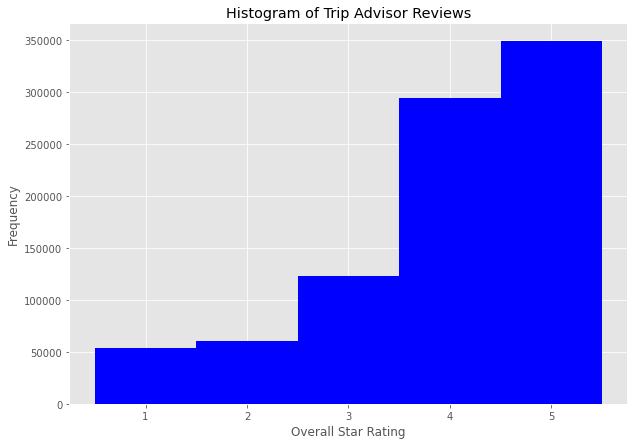

In [7]:
import matplotlib.pyplot as plt
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
plt.style.use("ggplot")

plt.figure(figsize=(10, 7))

plt.hist(df_reviews['overall'], bins = bins, color = 'blue')

plt.title("Histogram of Trip Advisor Reviews")
plt.xlabel("Overall Star Rating")
plt.ylabel("Frequency")

plt.show()

In [ ]:
df_reviewers = df_reviews.groupby('reviewer_id').agg({
    'id': 'count',
    'overall': 'mean',
    'service': 'mean',
    'cleanliness': 'mean',
    'value': 'mean',
    'location': 'mean'
})

oneplusers = df_reviewers[df_reviewers['id']>1].count()
fiveplusers = df_reviewers[df_reviewers['id']>5].count()
total = df_reviewers.shape[0]

print(f'oneplusers share: {oneplusers/total*100}, fiveplusers: {fiveplusers/total*100}, total: {total}')



oneplusers share: id             20.756422
overall        20.756422
service        20.314416
cleanliness    20.319444
value          20.312855
location       19.415664
dtype: float64, fiveplusers: id             1.257870
overall        1.257870
service        1.253015
cleanliness    1.253362
value          1.253188
location       1.246252
dtype: float64, total: 576689


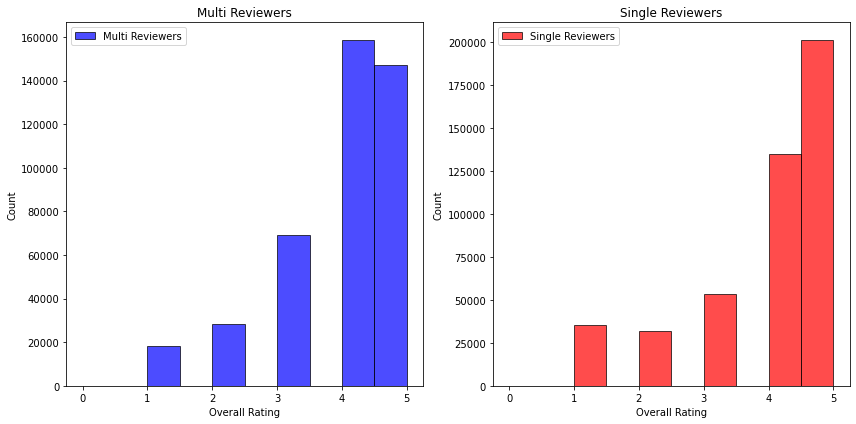

119700


In [ ]:
import matplotlib.pyplot as plt

reviewer_counts = df_reviews['reviewer_id'].value_counts()
multi_reviewer_ids = reviewer_counts[reviewer_counts > 1].index
single_reviewer_ids = reviewer_counts[reviewer_counts == 1].index

# Filter the DataFrame to only include these IDs
df_multireviewer = df_reviews[df_reviews['reviewer_id'].isin(multi_reviewer_ids)].reset_index(drop=True)
df_singlereviewer = df_reviews[df_reviews['reviewer_id'].isin(single_reviewer_ids)].reset_index(drop=True)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].hist(df_multireviewer['overall'], bins=10, edgecolor='black', alpha=0.7, color='blue', label='Multi Reviewers')
ax[1].hist(df_singlereviewer['overall'], bins=10, edgecolor='black', alpha=0.7, color='red', label='Single Reviewers')

ax[0].set_title('Multi Reviewers')
ax[1].set_title('Single Reviewers')

for axis in ax:
    axis.set_xlabel('Overall Rating')
    axis.set_ylabel('Count')
    axis.legend()

plt.tight_layout()
plt.show()
print(len(multi_reviewer_ids))

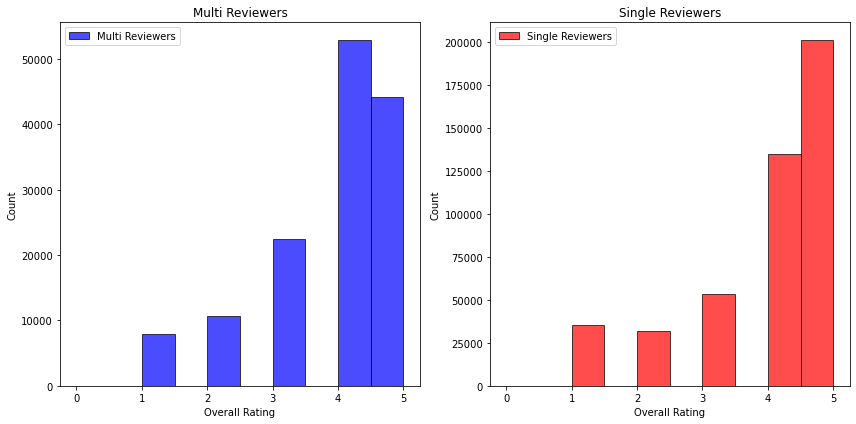

7254


In [ ]:
import matplotlib.pyplot as plt

reviewer_counts = df_reviews['reviewer_id'].value_counts()
multi_reviewer_ids = reviewer_counts[reviewer_counts > 5].index
single_reviewer_ids = reviewer_counts[reviewer_counts == 1].index

# Filter the DataFrame to only include these IDs
df_multireviewer = df_reviews[df_reviews['reviewer_id'].isin(multi_reviewer_ids)].reset_index(drop=True)
df_singlereviewer = df_reviews[df_reviews['reviewer_id'].isin(single_reviewer_ids)].reset_index(drop=True)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].hist(df_multireviewer['overall'], bins=10, edgecolor='black', alpha=0.7, color='blue', label='Multi Reviewers')
ax[1].hist(df_singlereviewer['overall'], bins=10, edgecolor='black', alpha=0.7, color='red', label='Single Reviewers')

ax[0].set_title('Multi Reviewers')
ax[1].set_title('Single Reviewers')

for axis in ax:
    axis.set_xlabel('Overall Rating')
    axis.set_ylabel('Count')
    axis.legend()

plt.tight_layout()
plt.show()
print(len(multi_reviewer_ids))

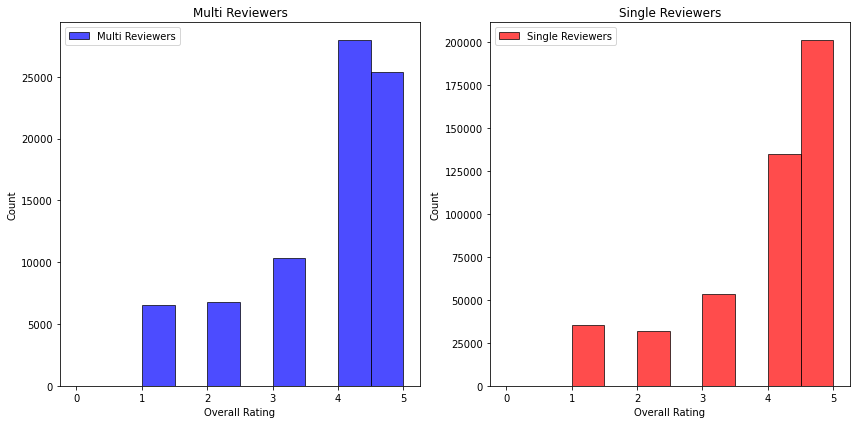

1


In [ ]:
import matplotlib.pyplot as plt

reviewer_counts = df_reviews['reviewer_id'].value_counts()
multi_reviewer_ids = reviewer_counts[reviewer_counts > 500].index
single_reviewer_ids = reviewer_counts[reviewer_counts == 1].index

# Filter the DataFrame to only include these IDs
df_multireviewer = df_reviews[df_reviews['reviewer_id'].isin(multi_reviewer_ids)].reset_index(drop=True)
df_singlereviewer = df_reviews[df_reviews['reviewer_id'].isin(single_reviewer_ids)].reset_index(drop=True)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].hist(df_multireviewer['overall'], bins=10, edgecolor='black', alpha=0.7, color='blue', label='Multi Reviewers')
ax[1].hist(df_singlereviewer['overall'], bins=10, edgecolor='black', alpha=0.7, color='red', label='Single Reviewers')

ax[0].set_title('Multi Reviewers')
ax[1].set_title('Single Reviewers')

for axis in ax:
    axis.set_xlabel('Overall Rating')
    axis.set_ylabel('Count')
    axis.legend()

plt.tight_layout()
plt.show()
print(len(multi_reviewer_ids))

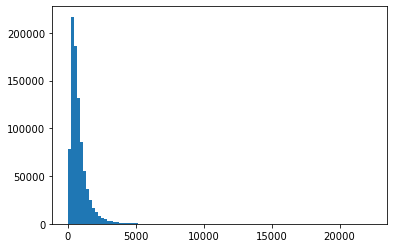

In [ ]:
import matplotlib.pyplot as plt
df_reviews['review_length'] = df_reviews['text'].apply(len)
plt.hist(df_reviews['review_length'], bins=100)
plt.show()

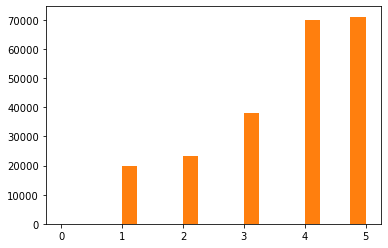

In [ ]:
long_reviews = df_reviews[df_reviews['review_length']>1000]
short_reviews = df_reviews[df_reviews['review_length']>=1000]

plt.hist(long_reviews['overall'], bins=20)
plt.hist(short_reviews['overall'], bins=20)
plt.show()

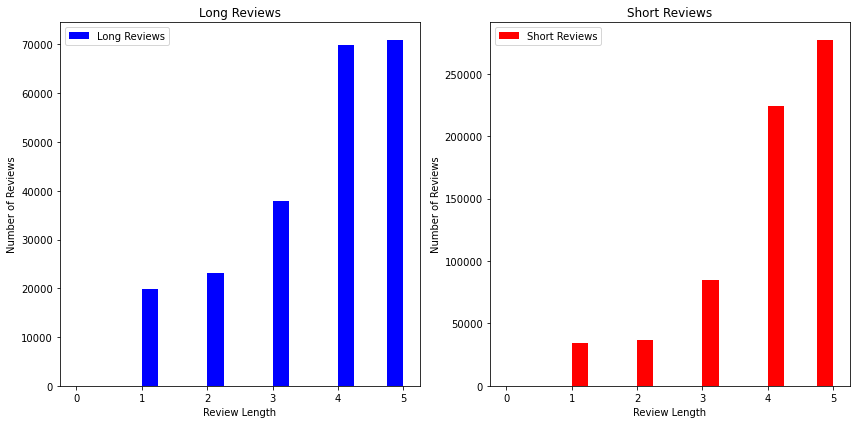

In [ ]:
long_reviews = df_reviews[df_reviews['review_length'] > 1000]
short_reviews = df_reviews[df_reviews['review_length'] <= 1000] 

long_reviews.head()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist(long_reviews['overall'], bins=20, color='blue', label='Long Reviews')
ax[1].hist(short_reviews['overall'], bins=20, color='red', label='Short Reviews')

ax[0].set_title('Long Reviews')
ax[1].set_title('Short Reviews')

for axis in ax:
    axis.set_xlabel('Review Length')
    axis.set_ylabel('Number of Reviews')
    axis.legend()

plt.tight_layout()
plt.show()
# 

In [42]:
df_ratings.head()

,service,cleanliness,overall,value,location,sleep_quality,rooms,check_in_front_desk,business_service_(e_g_internet_access)
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
2,4.0,5.0,4.0,4.0,5.0,4.0,4.0,NaN,NaN
3,5.0,5.0,4.0,5.0,5.0,5.0,5.0,NaN,NaN
4,4.0,5.0,4.0,3.0,5.0,5.0,5.0,NaN,NaN
